<h2 style="color: green;">3. 옵티마이저</h2>

옵티마이저(Optimizer)란, 딥러닝 모델의 학습 과정에서 모델의 파라미터를 업데이트하는 알고리즘입니다. 즉, 모델이 학습 데이터에 대해 최적의 결과를 도출하기 위해 모델의 가중치(weight)와 편향(bias)을 조정하는 데 사용됩니다.

옵티마이저는 손실 함수(loss function)에서 계산된 그래디언트(gradient)를 이용하여 모델의 파라미터를 업데이트합니다. 손실 함수는 모델의 예측 값과 실제 값의 차이를 계산하는 함수로, 이 값을 최소화하는 방향으로 모델의 파라미터를 조정합니다.

**옵티마이저의 종류**

+ 경사 하강법(Gradient Descent)
<br></br>
+ 모멘텀(Momentum)
<br></br>
+ 아다그라드(Adagrad)
<br></br>
+ 알엠에스프롭(RMSprop)
<br></br>
+ 아담(Adam)

<br></br>
## 경사 하강법 (Gradient Descent)

가장 기본적인 최적화 알고리즘 중 하나로, 가중치를 조정할 때 매개변수에 대한 손실함수의 기울기 (gradient)를 이용하여 최적화하는 방법입니다. 즉, 가중치 업데이트는 현재 가중치에서 기울기를 빼는 방식으로 이루어집니다.

Gradient Descent는 크게 Batch Gradient Descent, Stochastic Gradient Descent(SGD), Mini-batch Gradient Descent로 나뉩니다.
<br></br>

+ ### 배치 경사 하강법 *Batch Gradient Descent*

Batch Gradient Descent는 전체 데이터셋에 대해 기울기를 계산하고 가중치를 업데이트합니다. 즉, 전체 데이터셋을 한번에 처리하므로 한번에 메모리를 많이 사용하게 되고, 처리시간이 오래 걸릴 수 있습니다. 하지만 전체 데이터셋에 대한 기울기를 계산하므로 최소값에 수렴하는 속도는 빠릅니다.

+ ### 미니배치 경사 하강법 *Mini-batch Gradient Descent*

Mini-batch Gradient Descent는 전체 데이터셋의 일부(mini-batch)에 대해서만 기울기를 계산하고 가중치를 업데이트합니다. 즉, 전체 데이터셋보다 메모리 사용량이 적으면서, 한 개의 데이터를 처리 하는 SGD보다 안정적으로 최적값에 수렴할 수 있습니다.

+ ### 확률적 경사 하강법 *Stochastic Gradient Descent (SGD)*

Stochastic Gradient Descent는 데이터 하나씩 기울기를 계산하고 가중치를 업데이트합니다. 즉, 데이터 한 개씩 처리하므로 전체 데이터셋보다 메모리 사용량이 적지만, 최소값에 수렴하는 속도가 느릴 수 있습니다. 또한, 경사 하강 방향이 매번 달라져서 최적값에 수렴하는 과정에서 지그재그로 이동하는 현상이 발생할 수 있습니다.

<br></br>
## *경사 하강법을 이용한 선형 회귀 모델 구현*

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 데이터, 타깃 데이터 생성, y=2x + 1 관계를 따르는 데이터 생성
x = np.array([1,2,3,4,5])
y = np.array([3,5,7,9,11])

In [17]:
# 모델 예측값과 실제값 사이의 오차를 계산하는 함수 정의
def compute_error(w0, w1, x, y) :
    y_pred = w0 + w1 * x
    error = y - y_pred
    
    return error

In [18]:
# 경사 하강법을 수행하는 함수 정의
def gradient_descent(x, y, lr=0.05, iterations=1000) :
    #n은 데이터 x의 개수
    n = len(x)
    #w0 -> 절편 값 w1 -> 기울기 값
    w0 = 0
    w1 = 0
    
    for i in range(iterations) :
        error = compute_error(w0, w1, x, y)
        #관행적으로 가중치를 업데이트할 때 -2.0의 상수를 사용
        w0 -= lr * (-2.0 / n) * np.sum(error)
        w1 -= lr * (-2.0 / n) * np.sum(error * x)
        
    return w0 , w1

0.9999999836757114 2.0000000045215662


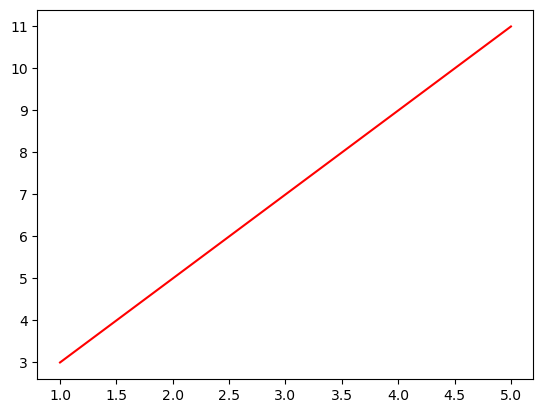

In [19]:
# 경사 하강법을 이용한 선형 회귀 모델 구현 시각화
# 모델 학습
w0, w1 = gradient_descent(x, y)
print(w0, w1)

plt.plot(x, w0+w1 * x, color='red')
plt.show()

## *다중 선형 : 경사 하강법을 이용한 다중 선형 회귀 구현*

In [20]:
# 데이터 생성
x1 = np.array([1,2,3,4,5])
x2 = np.array([0,1,0,1,0])

y = np.array([3,5,7,9,11])

In [21]:
def gradient_descent(x1, x2, y, lr, iterations) :
    
    # 초기값 설정
    n = len(y)
    beta_0 = 0
    beta_1 = 0
    beta_2 = 0
    
    # 경사하강법 수행
    for i in range(iterations) :
        y_pred = beta_0 + beta_1 * x1 + beta_2 * x2
        error = y_pred - y
        
        # 업데이트
        beta_0 -= lr * (1/n) * np.sum(error)
        beta_1 -= lr * (1/n) * np.sum(error * x1)
        beta_2 -= lr * (1/n) * np.sum(error * x2)
        
    return beta_0, beta_1, beta_2

In [22]:
beta_0, beta_1, beta_2= gradient_descent(x1, x2, y, 0.01, 1000)
print("beta_0 >> ", beta_0)
print("beta_1 >> ", beta_1)
print("beta_2 >> ", beta_2)

beta_0 >>  0.8907546215358821
beta_1 >>  2.0237699271134932
beta_2 >>  0.057888309859129156


In [23]:
x1_new = 2
x2_new = 1

# 예측 되어야하는 값 5
y_pred_temp = beta_0 + beta_1 * x1_new + beta_2 + x2_new
print("Predicted y value >> ", y_pred_temp)

Predicted y value >>  5.996182785621997


## 모멘텀 (Momentum)

+ ### *Momentum Optimization*

Momentum Optimization은 Gradient Descent의 한계를 보완하기 위해 등장한 방법 중 하나입니다. 이전 기울기의 방향과 크기를 고려하여 새로운 기울기를 계산합니다. 이전 기울기의 방향이 현재 기울기와 일치하면 가중치를 더 크게 업데이트하고, 그렇지 않으면 더 작게 업데이트합니다.

예를 들어, 기울기가 대각선 방향으로 지속적으로 나오는 경우, 일반적인 Gradient Descent는 오랜 시간 동안 최적점에 수렴하지 못하고 지그재그로 움직이게 됩니다. 하지만 Momentum Optimization은 이전 기울기를 더해서 가중치 업데이트를 수행하기 때문에 이전 방향을 유지하면서 최적점에 빠르게 수렴할 수 있습니다.

이전 기울기와 현재 기울기의 비율을 조절하는 momentum 하이퍼파라미터를 설정할 수 있습니다. momentum 값이 0에 가까울수록 Gradient Descent와 유사해지며, 1에 가까울수록 이전 방향을 보존하는 정도가 높아집니다. 적절한 momentum 값을 설정하면 보다 빠르고 안정적인 학습을 할 수 있습니다.

<br></br>
## 아다그라드 (Adagrad)

+ ### *Adagrad Optimization*

각각의 매개변수에 서로 다른 학습률을 적용하는 방식을 사용하여, 데이터 셋에서 매개변수에 대한
제곱된 그래디언트의 역사를 누적함으로써 각각의 매개변수에 대한 적응적인 학습률을 계산합니다.
기울기 제곱 값의 누적 합을 이용해 학습률을 조절하는 방식으로, 매개변수별로 학습률을 조절할 수 있는 방법입니다. 이전 기울기들의 제곱을 누적하여 학습률을 조절하므로 처음에는 크게 업데이트하다가 점차 학습률이 줄어들게 됩니다. 이러한 방식은 기울기의 크기가 큰 매개변수는 학습률이 감소하고, 기울기의 크기가 작은 매개변수는 학습률이 증가하는 경향을 보입니다.

Adagrad의 장점으로는 매개변수의 전역 학습률을 조절하는 것이 아니라, 개별 매개변수의 학습률을 적절하게 조절할 수 있어, 매개변수의 스케일에 덜 민감해진다는 점이 있습니다. 하지만, 단점으로는 누적된 제곱 기울기 값이 계속해서 커져서 학습률이 점점 작아지는 문제가 있어, 학습이 오래될수록 업데이트가 매우 느려지는 경향이 있습니다. 이러한 단점을 보완하기 위해 RMSprop 과 Adam이 등장하게 됩니다.

Adagrad 최적화 기법에는 다른 종류가 없습니다. Adagrad는 하이퍼파라미터인 학습률(learning rate)을 매개변수마다 따로 설정하는 방식으로 동작하므로, 하나의 하이퍼파라미터만 설정하면 됩니다.

<br></br>
## 알엠에스프롭 (RMSprop)

+ ### *RMSprop Optimization*

Adagrad의 단점을 보완한 방법 중 하나로, 기울기 제곱의 이동평균을 사용하여 학습률을 조절합니다.

Adagrad는 학습률을 조절하는 방법으로 각 매개변수에 대한 학습률을 따로 설정하였습니다. 이 때, 빈번하게 발생하는 기울기의 작은 값으로 인해 학습률이 지나치게 작아지는 문제가 발생합니다. RMSprop 은 이 문제를 해결하기 위해 기울기 제곱의 이동평균을 사용합니다.

RMSprop은 이동평균을 구할 때 지수이동평균(Exponential Moving Average, EMA)을 사용합니다. EMA는 이동평균을 구할 때 과거의 값들을 지수적으로 감소시키면서 현재 값을 계산하는 방식입니다. 이 때, 이동평균을 구하는 지수가중치(decay rate)를 하이퍼파라미터로 설정할 수 있습니다.

**RMSprop의 학습률 조절 방법은 다음과 같습니다.**
1. 기울기 제곱의 이동평균을 구합니다.
2. 구한 이동평균으로 학습률을 조절합니다.

즉, RMSprop은 과거 기울기의 크기를 고려하여 적절한 학습률을 계산합니다. 이러한 방식으로 RMSprop은 Adagrad보다 빠르게 수렴하면서도 더 안정적으로 학습할 수 있습니다.

<br></br>
## 아담 (Adam)

Momentum Optimization과 Adagrad Optimization의 아이디어를 결합한 옵티마이저입니다. Adam은 각 매개 변수마다 적응적인 학습률을 사용하며, 이전 기울기의 지수 가중 이동 평균과 이전 기울기 제곱의 지수 가중 이동 평균을 계산하여 학습률을 조정합니다.

**Adam은 다음과 같은 식을 사용합니다.**
1. 현재 시점의 기울기를 계산합니다.
2. 이전 기울기의 지수 가중 이동평균과 이전 기울기 제곱의 지수 가중 이동평균을 계산합니다.
3. 학습률을 적응적으로 조정합니다.
4. 매개변수를 업데이트합니다.

Momentum Optimization과 마찬가지로 이전 기울기의 방향과 크기를 고려하면서 매개변수를 업데이트 하기 때문에, 경사면이 급격하게 변하는 지점에서 빠르게 최적점에 다가갈 수 있습니다. 또한, Adagrad Optimization처럼 각 매개변수마다 적응적인 학습률을 사용하기 때문에, 학습이 더욱 안정적으로 이루어질 수 있습니다.

## *선형 회귀 모델의 학습에서 다양한 옵티마이저를 적용*

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# 데이터 로드
california = fetch_california_housing()
x = california.data
y = california.target

# 데이터 스케일링
scaler = StandardScaler()
x = scaler.fit_transform(x)
# 데이터를 표준화(standardization)합니다. 표준화는 각 특징의 평균을 0, 표준 편차를 1로 만들어 데이터의 스케일을 일정하게 조정하는 과정입니다.

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 모델 생성 및 하이퍼파라미터 설정
input_dim = x.shape[1]
output_dim = 1
learning_rate = 0.0001
num_epochs = 1000

model = nn.Linear(input_dim, output_dim)

In [26]:
# 다양한 옵티마이저 설정
optimizers = {"SGD" : optim.SGD(model.parameters(), lr=learning_rate),
             "Momentum" : optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9),
             "Adagrad" : optim.Adagrad(model.parameters(), lr=learning_rate),
             "RMSprop" : optim.RMSprop(model.parameters(), lr=learning_rate),
             "Adam" : optim.Adam(model.parameters(), lr=learning_rate)}

In [27]:
# 모델 학습
for optimizer_name, optimizer in optimizers.items() :
    criterion = nn.MSELoss()
    optimizer.zero_grad()
    
    for epoch in range(num_epochs) :
        inputs = torch.tensor(x_train, dtype=torch.float32)
        labels = torch.tensor(y_train, dtype=torch.float32)
        
        #Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.view_as(outputs))  # 크기를 조절하여 일치시킴
        
        #Backward and optimize
        loss.backward()
        optimizer.step()
        
        #Print progress
        if (epoch+1) % 100 == 0:
            print(f"{optimizer_name} - Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}")

SGD - Epoch [100/1000], Loss : 0.7637
SGD - Epoch [200/1000], Loss : 5.3000
SGD - Epoch [300/1000], Loss : 1.8422
SGD - Epoch [400/1000], Loss : 3.8251
SGD - Epoch [500/1000], Loss : 3.3539
SGD - Epoch [600/1000], Loss : 2.4609
SGD - Epoch [700/1000], Loss : 4.5974
SGD - Epoch [800/1000], Loss : 1.5708
SGD - Epoch [900/1000], Loss : 5.2728
SGD - Epoch [1000/1000], Loss : 1.0989
Momentum - Epoch [100/1000], Loss : 1.2320
Momentum - Epoch [200/1000], Loss : 7.1784
Momentum - Epoch [300/1000], Loss : 238.3185
Momentum - Epoch [400/1000], Loss : 1181.8108
Momentum - Epoch [500/1000], Loss : 425.5255
Momentum - Epoch [600/1000], Loss : 132312.6719
Momentum - Epoch [700/1000], Loss : 1331828.2500
Momentum - Epoch [800/1000], Loss : 771723.1875
Momentum - Epoch [900/1000], Loss : 54261868.0000
Momentum - Epoch [1000/1000], Loss : 1145958784.0000
Adagrad - Epoch [100/1000], Loss : 1176655872.0000
Adagrad - Epoch [200/1000], Loss : 1176655872.0000
Adagrad - Epoch [300/1000], Loss : 1176655872.0